In [1]:
import nbimporter
import json
import numpy as np
from classifiers import SentiWn
import matplotlib.pyplot as plt

Importing Jupyter notebook from classifiers.ipynb


In [2]:
yelp_file = 'data/yelp_example_1.json'
with open(yelp_file, 'r') as infile:
    data = json.load(infile)
docs = data['docs']
titles = data['titles']
scores = data['scores']
y_true = np.zeros(len(scores))
for i, score in enumerate(scores):
    if score > 3:
        y_true[i] = 1
    elif score < 3:
        y_true[i] = -1
    else:
        pass

In [15]:
wn = SentiWn(strategy='sum', use_pos=True)

In [16]:
y_pred = wn.predict(docs)

In [17]:
y_pred[:10]

array([ 0.,  0.,  0.,  1.,  1., -1.,  0.,  0.,  0.,  1.])

In [18]:
y_true[:10]

array([-1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  0.])

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [20]:
report = classification_report(y_true, y_pred)

In [21]:
print(report)

              precision    recall  f1-score   support

        -1.0       0.40      0.39      0.39      1016
         0.0       0.13      0.55      0.20       642
         1.0       0.81      0.30      0.43      3342

    accuracy                           0.35      5000
   macro avg       0.45      0.41      0.34      5000
weighted avg       0.64      0.35      0.40      5000



In [22]:
cm = confusion_matrix(y_true, y_pred)

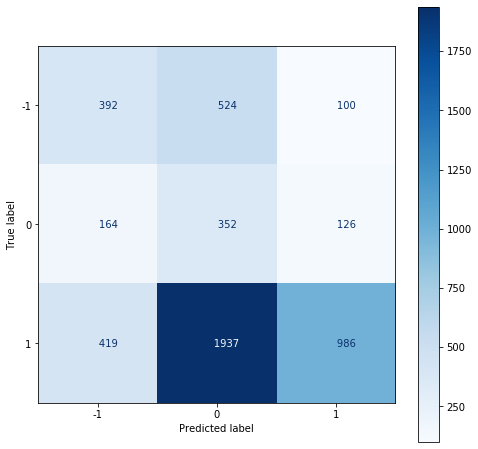

In [23]:
fig, ax = plt.subplots(figsize=(8, 8))
d = ConfusionMatrixDisplay(cm, [-1, 0, 1])
d.plot(cmap=plt.cm.Blues, ax=ax, values_format='10.0f')
plt.show()